NAME: __TODO: Vignesh Murugan

# Machine Learning Practice - Asynchronous
## Homework 08: Support Vector Machines for Classification


### Task
For this assignment you will be exploring the use of support vector machines (SVMs)
for a binary classification task.  In particular, you will be experimenting with different kernels and hyper-parameters.


### Data set
The data set contains a set of 1000 examples, each with a binary class label.  The data have already been divided into a training set and a validation set.


### Objectives
* Understanding Support Vector Machines
* Exploring SVM kernel types and hyper-parameters

### Instructions
* All Homework must be individual work.  Do not look at or copy solutions of other students or that are available on the Internet or via LLMs
* Only work in a copy of the file that is from your ~/homework_in/ directory
   + If you do not use your own copy of this file, then it is an automatic zero on the assignment
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results.  Note that because we are reusing variables, the order of execution is *really* important (you should code assuming top to bottom execution).
* All the plotting functions have been provided. You should not need to alter any of these.
* Hand-In Procedure
  + Make sure that your notebook has been saved.  You are responsible for ensuring that the copy that you submit is current and complete
  + The name of the file should be the same as what we gave you
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradescope Notebook HW08 dropbox


### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/api/sklearn.linear_model.html)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/api/sklearn.model_selection.html)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/api/sklearn.ensemble.html)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html)
* [Scoring Parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
* [Plot ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Precision, Recall, F1 Score](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Precision-Recall Curve](https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used)
* [Probability Plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import SVC
import joblib
import pdb

# This is important for producing the right results for some versions of scipy
import itertools


# Default figure parameters
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


# LOAD DATA

In [2]:
fname = '/mlp/datasets/hw08_dat.pkl'

with open(fname, 'rb') as f:
    dat = pkl.load(f)

In [3]:
dat

{'meta:': 'hw08 data set',
 'ins_train': array([[ 0.15913053, -0.08412346,  2.40102408, ..., -1.15875611,
          0.18106324,  0.62954199],
        [ 1.31334881,  0.74764017,  0.20252667, ..., -1.62149472,
         -0.11162767,  0.54145528],
        [ 2.1516972 , -0.20268027, -0.81473499, ...,  1.49617323,
         -0.40487708, -0.39243952],
        ...,
        [ 0.39025957,  0.10657407, -1.96518606, ..., -1.1632933 ,
          1.29163677, -0.35255408],
        [-0.65096148,  0.78925761,  0.61194695, ..., -2.05449447,
         -1.72111813, -0.43903649],
        [-1.65430592,  0.13888085,  0.11683378, ...,  0.67553507,
          2.26538747, -0.26950695]]),
 'outs_train': array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 

In [4]:
# TODO: Extract the training and validation sets
ins_train = dat['ins_train']
outs_train = dat['outs_train']
ins_val = dat['ins_val']
outs_val = dat['outs_val']

## Visualization and Analysis

In [5]:
# PROVIDED

# Generate a color map plot for a confusion matrix
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    ''' 
    Generate a figure that plots a colormap of a matrix
    PARAMS:
        mtx: matrix of values
        xnames: list of x tick names
        ynames: list of the y tick names
        cbarlabel: label for the color bar
    RETURNS:
        fig, ax: the corresponding handles for the figure and axis
    '''
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    
    # create the figure and plot the correlation matrix
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(mtx, cmap='summer')
    if not cbarlabel == "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # Specify the row and column ticks and labels for the figure
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, 
             ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            text = ax.text(j, i, "%s = %d" % (lbl[i,j], mtx[i, j]),
                           ha="center", va="center", color="k")

    return fig, ax

# Compute the ROC Curve and generate the KS plot
def ks_roc_plot(targets, scores, FIGWIDTH=10, FIGHEIGHT=4, FONTSIZE=14):
    ''' 
    Generate a figure that plots the ROC Curve and the distributions 
    of the TPR and FPR over a set of thresholds. 
    PARAMS:
        targets: list of true target labels
        scores: list of prediction scores
    '''
    # Compute ROC
    fpr, tpr, thresholds = roc_curve(targets, scores)
    auc_roc = auc(fpr, tpr)
    
    # Compute positve fraction
    pos = np.where(targets)[0]
    npos = len(pos)
    pos_frac = npos / targets.shape[0]

    # Generate KS plot
    fig, ax = plt.subplots(1, 2, figsize=(FIGWIDTH,FIGHEIGHT))
    axs = ax.ravel()
    
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].set_xlim([0,1])
    ax[0].invert_xaxis()
    ax[0].set(xlabel='threshold', ylabel='fraction')
    ax[0].legend(['TPR', 'FPR', 'Difference'], fontsize=FONTSIZE)
    
    # Generate ROC Curve plot
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0,1], [0,1], 'r--')
    ax[1].set(xlabel='FPR', ylabel='TPR')
    ax[1].set_aspect('equal', 'box')
    auc_text = ax[1].text(.05, .95, "AUC = %.4f" % auc_roc, 
                          color="k", fontsize=FONTSIZE)

# SVM Models


##  &#x4c;&#x69;&#x6e;&#x65;&#x61;&#x72; &#x4b;&#x65;&#x72;&#x6e;&#x65;&#x6c;

&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x61;&#x6e;&#x64; &#x65;&#x76;&#x61;&#x6c;&#x75;&#x61;&#x74;&#x65; &#x61; &#x53;&#x56;&#x4d; &#x75;&#x73;&#x69;&#x6e;&#x67; &#x74;&#x68;&#x65; &#x53;&#x56;&#x43; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x61;&#x6e;&#x64; &#x61; &#x6c;&#x69;&#x6e;&#x65;&#x61;&#x72; &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c;.  

*   &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x79;=&#x54;&#x72;&#x75;&#x65; &#x61;&#x72;&#x67;&#x75;&#x6d;&#x65;&#x6e;&#x74; &#x73;&#x6f; &#x74;&#x68;&#x61;&#x74; &#x74;&#x68;&#x65; &#x6d;&#x6f;&#x64;&#x65;&#x6c; &#x63;&#x61;&#x6e; &#x62;&#x65; &#x61;&#x73;&#x6b;&#x65;&#x64; &#x74;&#x6f; &#x72;&#x65;&#x74;&#x75;&#x72;&#x6e; &#x61; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x79; &#x75;&#x73;&#x69;&#x6e;&#x67; &#x6d;&#x6f;&#x64;&#x65;&#x6c;.&#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;_&#x70;&#x72;&#x6f;&#x62;&#x61;()

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

*   &#x54;&#x72;&#x79; &#x73;&#x65;&#x76;&#x65;&#x72;&#x61;&#x6c; &#x64;&#x69;&#x66;&#x66;&#x65;&#x72;&#x65;&#x6e;&#x74; &#x72;&#x65;&#x67;&#x75;&#x6c;&#x61;&#x72;&#x69;&#x7a;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x70;&#x61;&#x72;&#x61;&#x6d;&#x65;&#x74;&#x65;&#x72; &#x76;&#x61;&#x6c;&#x75;&#x65;&#x73;, &#x6c;&#x65;&#x61;&#x76;&#x69;&#x6e;&#x67; &#x74;&#x68;&#x65; "&#x62;&#x65;&#x73;&#x74;" &#x6f;&#x6e;&#x65; (&#x77;&#x69;&#x74;&#x68; &#x72;&#x65;&#x73;&#x70;&#x65;&#x63;&#x74; &#x74;&#x6f; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74; &#x70;&#x65;&#x72;&#x66;&#x6f;&#x72;&#x6d;&#x61;&#x6e;&#x63;&#x65;) &#x76;&#x69;&#x73;&#x69;&#x62;&#x6c;&#x65; &#x66;&#x6f;&#x72; &#x67;&#x72;&#x61;&#x64;&#x69;&#x6e;&#x67;

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.7100
Validation Accuracy: 0.6560


Best C value: 0.007, with Validation Accuracy: 0.698


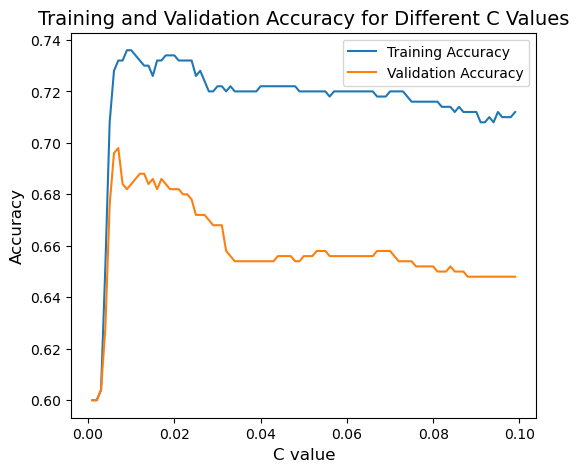

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables to track the best C, its accuracy, and accuracies for both sets
best_C = None
best_accuracy = 0
C_values = []
train_accuracies = []
val_accuracies = []

# Try multiple values of the regularization parameter C
for C_value in np.arange(0.001, 0.1, 0.001):
    # Define and train the SVM model with the specified C value
    model = SVC(kernel='linear', C=C_value, probability=True)
    model.fit(ins_train, outs_train)
    
    # Predict on the training and validation sets
    preds_train = model.predict(ins_train)
    pred_val = model.predict(ins_val)
    
    # Compute accuracy for both training and validation sets
    train_accuracy = accuracy_score(outs_train, preds_train)
    val_accuracy = accuracy_score(outs_val, pred_val)
    
    # Store the C value and corresponding accuracies
    C_values.append(C_value)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Update best C if the current validation accuracy is higher
    if val_accuracy > best_accuracy:
        best_C = C_value
        best_accuracy = val_accuracy

# Print the best C value after all iterations
print(f"Best C value: {best_C}, with Validation Accuracy: {best_accuracy}")


# Plotting the training and validation accuracy for each C value
plt.plot(C_values, train_accuracies, label="Training Accuracy")
plt.plot(C_values, val_accuracies, label="Validation Accuracy")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Different C Values")
plt.legend()
plt.show()


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel='linear', C=best_C, probability=True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.7320
Validation Accuracy: 0.6980



## &#x54;&#x4f;&#x44;&#x4f;

&#x43;&#x6f;&#x6d;&#x70;&#x75;&#x74;&#x65; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x61;&#x6e;&#x64; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x70;&#x72;&#x6f;&#x64;&#x75;&#x63;&#x65;&#x64; &#x62;&#x79; &#x74;&#x68;&#x65; &#x6c;&#x65;&#x61;&#x72;&#x6e;&#x65;&#x64; &#x6d;&#x6f;&#x64;&#x65;&#x6c; 
&#x66;&#x6f;&#x72; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x61;&#x6e;&#x64; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74;
*  &#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;()

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

*  &#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;_&#x70;&#x72;&#x6f;&#x62;&#x61;()


In [9]:
# TODO: Compute predictions and probabilities for both training and validation sets

# Predict labels for the training and validation sets
preds_train = model.predict(ins_train)
preds_val = model.predict(ins_val)

# Calculate probabilities for the training and validation sets
train_probabilities = model.predict_proba(ins_train)
val_probabilities = model.predict_proba(ins_val)


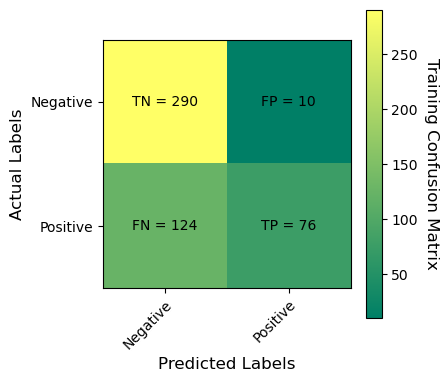

In [10]:
# PROVIDED: Execute cell
targetnames = ['Negative', 'Positive']

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames, "Training Confusion Matrix")
plt.show()


&#x54;&#x4f;&#x44;&#x4f;: &#x50;&#x6c;&#x6f;&#x74; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x73;&#x65;&#x74;
*  &#x46;&#x6f;&#x63;&#x75;&#x73; &#x6f;&#x6e; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

*  &#x44;&#x6f;&#x6e;'&#x74; &#x66;&#x6f;&#x72;&#x67;&#x65;&#x74; &#x79;&#x6f;&#x75;&#x72; &#x61;&#x78;&#x69;&#x73; &#x6c;&#x61;&#x62;&#x65;&#x6c;&#x73;

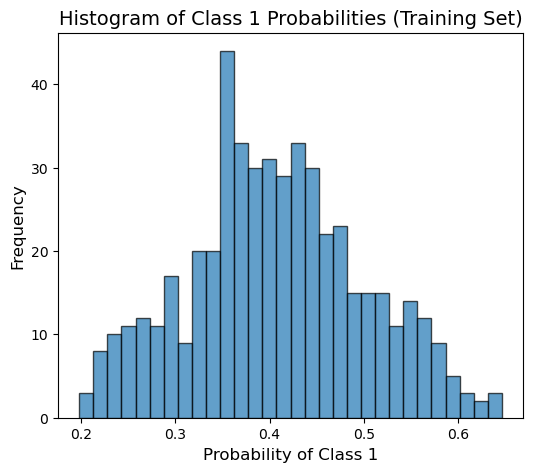

In [11]:
# TODO

# Plot the histogram for the class 1 probabilities..
plt.hist(train_probabilities[:, 1], bins=30, edgecolor='black', alpha=0.7)  
plt.xlabel("Probability of Class 1")  
plt.ylabel("Frequency")  
plt.title("Histogram of Class 1 Probabilities (Training Set)")  
plt.show()  


&#x47;&#x65;&#x6e;&#x65;&#x72;&#x61;&#x74;&#x65; &#x61; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65; &#x61;&#x6e;&#x64; &#x61; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65;

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

*  &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;


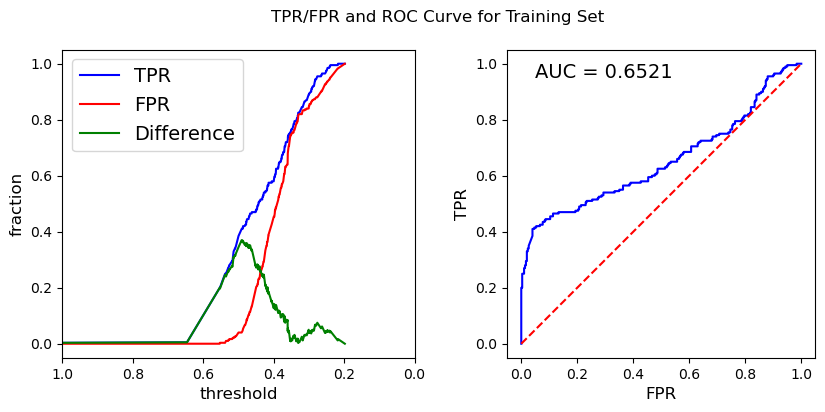

In [12]:
ks_roc_plot(outs_train, train_probabilities[:, 1])  

plt.suptitle("TPR/FPR and ROC Curve for Training Set") 
plt.show()  


### &#x56;&#x69;&#x73;&#x75;&#x61;&#x6c;&#x69;&#x7a;&#x65; &#x56;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x50;&#x65;&#x72;&#x66;&#x6f;&#x72;&#x6d;&#x61;&#x6e;&#x63;&#x65;

&#x54;&#x4f;&#x44;&#x4f;: 
*  &#x53;&#x68;&#x6f;&#x77; &#x74;&#x68;&#x65; &#x63;&#x6f;&#x6e;&#x66;&#x75;&#x73;&#x69;&#x6f;&#x6e; &#x6d;&#x61;&#x74;&#x72;&#x69;&#x78;
*  &#x50;&#x6c;&#x6f;&#x74; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;
*  &#x47;&#x65;&#x6e;&#x65;&#x72;&#x61;&#x74;&#x65; &#x61; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65; &#x61;&#x6e;&#x64; &#x61; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65;

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

   *  &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x70;&#x6f;&#x73;&#x69;&#x74;&#x69;&#x76;&#x65; &#x63;&#x6c;&#x61;&#x73;&#x73;

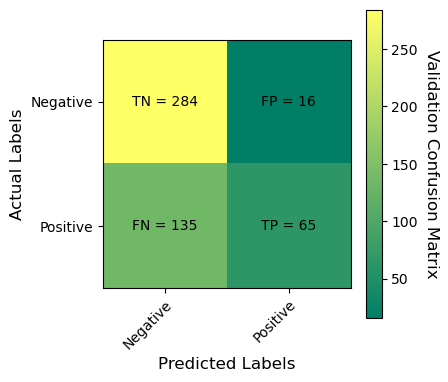

In [13]:
# Generate and display the confusion matrix for the validation set
val_confusion_mtx = confusion_matrix(outs_val, preds_val)
confusion_mtx_colormap(val_confusion_mtx, targetnames, targetnames, "Validation Confusion Matrix")
plt.show()

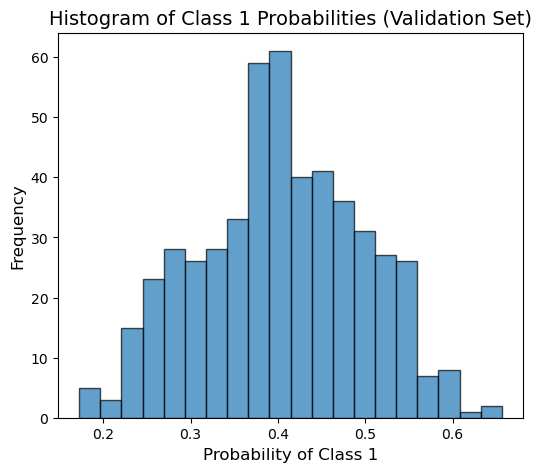

In [14]:
plt.hist(val_probabilities[:,1], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.title("Histogram of Class 1 Probabilities (Validation Set)")
plt.show()

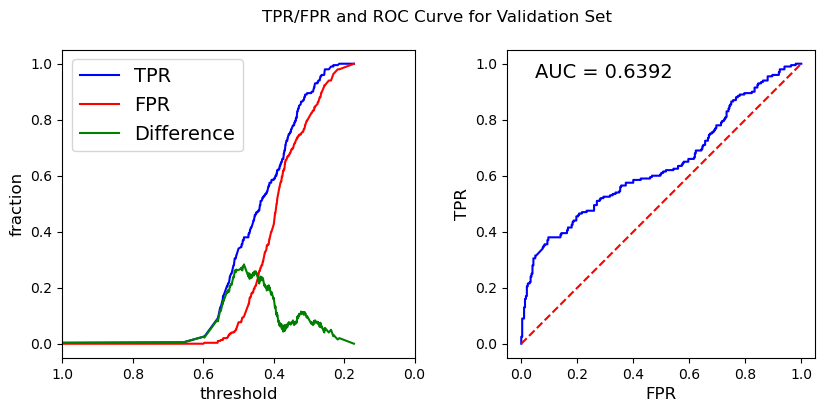

In [15]:

# Generate TPR/FPR figure and ROC Curve for the validation set
ks_roc_plot(outs_val, val_probabilities[:,1])
plt.suptitle("TPR/FPR and ROC Curve for Validation Set")
plt.show()



# &#x52;&#x65;&#x66;&#x6c;&#x65;&#x63;&#x74;&#x69;&#x6f;&#x6e;, &#x70;&#x61;&#x72;&#x74; &#x31;

&#x31;. &#x57;&#x68;&#x61;&#x74; &#x69;&#x73; &#x74;&#x68;&#x65; &#x61;&#x63;&#x63;&#x75;&#x72;&#x61;&#x63;&#x79; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x61;&#x6e;&#x64; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x64;&#x61;&#x74;&#x61; &#x73;&#x65;&#x74;&#x73;?


<font style="font-size:0px">&#x47;&#x69;&#x76;&#x65; &#x6c;&#x6f;&#x6e;&#x67; &#x61;&#x6e;&#x73;&#x77;&#x65;&#x72;&#x73;; &#x73;&#x6f;&#x6d;&#x65;&#x74;&#x69;&#x6d;&#x65;&#x73; &#x75;&#x73;&#x65; &#x74;&#x77;&#x6f; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;&#x73; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x73;&#x65;&#x6e;&#x74;&#x65;&#x6e;&#x63;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74; 

&#x32;. &#x49;&#x73; &#x74;&#x68;&#x65; &#x6d;&#x6f;&#x64;&#x65;&#x6c; &#x6f;&#x76;&#x65;&#x72;&#x66;&#x69;&#x74;&#x74;&#x69;&#x6e;&#x67;?  &#x48;&#x6f;&#x77; &#x64;&#x6f; &#x79;&#x6f;&#x75; &#x6b;&#x6e;&#x6f;&#x77;?


_Q1_

Training Accuracy: 0.7320 , Validation Accuracy: 0.6980

_Q2_

The Accuracy of the model on the validation set is 0.6980 while the accuracy on the training set is 0.7320. The model is overfitting as the training accuracy is higher than the validation accuracy.



## &#x50;&#x6f;&#x6c;&#x79;&#x6e;&#x6f;&#x6d;&#x69;&#x61;&#x6c; &#x4b;&#x65;&#x72;&#x6e;&#x65;&#x6c;

&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x61;&#x6e;&#x64; &#x65;&#x76;&#x61;&#x6c;&#x75;&#x61;&#x74;&#x65; &#x61; &#x53;&#x56;&#x4d; &#x75;&#x73;&#x69;&#x6e;&#x67; &#x74;&#x68;&#x65; &#x53;&#x56;&#x43; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x61;&#x6e;&#x64; &#x61; &#x70;&#x6f;&#x6c;&#x79;&#x6e;&#x6f;&#x6d;&#x69;&#x61;&#x6c; &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c;.  

*   &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x79;=&#x54;&#x72;&#x75;&#x65; &#x61;&#x72;&#x67;&#x75;&#x6d;&#x65;&#x6e;&#x74; &#x73;&#x6f; &#x74;&#x68;&#x61;&#x74; &#x74;&#x68;&#x65; &#x6d;&#x6f;&#x64;&#x65;&#x6c; &#x63;&#x61;&#x6e; &#x62;&#x65; &#x61;&#x73;&#x6b;&#x65;&#x64; &#x74;&#x6f; &#x72;&#x65;&#x74;&#x75;&#x72;&#x6e; &#x61; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x79; &#x75;&#x73;&#x69;&#x6e;&#x67; &#x6d;&#x6f;&#x64;&#x65;&#x6c;.&#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;_&#x70;&#x72;&#x6f;&#x62;&#x61;()

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

*   &#x54;&#x72;&#x79; &#x73;&#x65;&#x76;&#x65;&#x72;&#x61;&#x6c; &#x64;&#x69;&#x66;&#x66;&#x65;&#x72;&#x65;&#x6e;&#x74; &#x68;&#x79;&#x70;&#x65;&#x72;-&#x70;&#x61;&#x72;&#x61;&#x6d;&#x65;&#x74;&#x65;&#x72; &#x76;&#x61;&#x6c;&#x75;&#x65;&#x73;, &#x6c;&#x65;&#x61;&#x76;&#x69;&#x6e;&#x67; &#x74;&#x68;&#x65; "&#x62;&#x65;&#x73;&#x74;" &#x6f;&#x6e;&#x65; &#x76;&#x69;&#x73;&#x69;&#x62;&#x6c;&#x65; &#x66;&#x6f;&#x72; &#x67;&#x72;&#x61;&#x64;&#x69;&#x6e;&#x67;

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel='poly', C=1.0, probability=True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.8220
Validation Accuracy: 0.7240


Best C value: 3.701, with Validation Accuracy: 0.748


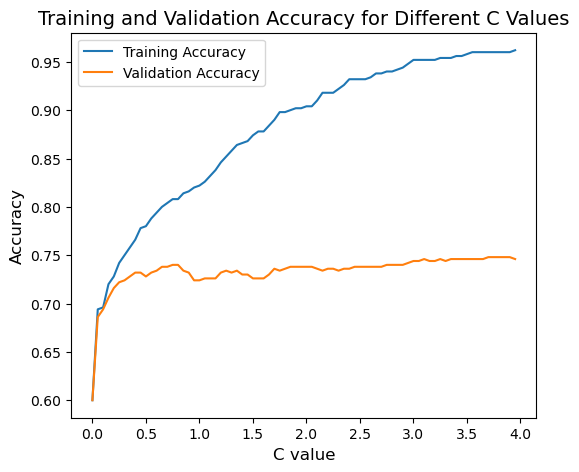

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables to track the best C, its accuracy, and accuracies for both sets
best_C = None
best_accuracy = 0
C_values = []
train_accuracies = []
val_accuracies = []

# Try multiple values of the regularization parameter C
for C_value in np.arange(0.001, 4, 0.05):
    # Define and train the SVM model with the specified C value
    model = SVC(kernel='poly', C=C_value, probability=True)
    model.fit(ins_train, outs_train)
    
    # Predict on the training and validation sets
    preds_train = model.predict(ins_train)
    pred_val = model.predict(ins_val)
    
    # Compute accuracy for both training and validation sets
    train_accuracy = accuracy_score(outs_train, preds_train)
    val_accuracy = accuracy_score(outs_val, pred_val)
    
    # Store the C value and corresponding accuracies
    C_values.append(C_value)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Update best C if the current validation accuracy is higher
    if val_accuracy > best_accuracy:
        best_C = C_value
        best_accuracy = val_accuracy

# Print the best C value after all iterations
print(f"Best C value: {best_C}, with Validation Accuracy: {best_accuracy}")


# Plotting the training and validation accuracy for each C value
plt.plot(C_values, train_accuracies, label="Training Accuracy")
plt.plot(C_values, val_accuracies, label="Validation Accuracy")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Different C Values")
plt.legend()
plt.show()


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel = 'poly', C = best_C, probability = True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9600
Validation Accuracy: 0.7480



## &#x54;&#x4f;&#x44;&#x4f;

&#x31;. &#x43;&#x6f;&#x6d;&#x70;&#x75;&#x74;&#x65; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x61;&#x6e;&#x64; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x70;&#x72;&#x6f;&#x64;&#x75;&#x63;&#x65;&#x64; &#x62;&#x79; &#x74;&#x68;&#x65; &#x6c;&#x65;&#x61;&#x72;&#x6e;&#x65;&#x64; &#x6d;&#x6f;&#x64;&#x65;&#x6c; &#x66;&#x6f;&#x72; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x61;&#x6e;&#x64; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74;

&#x32;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x63;&#x6f;&#x6e;&#x66;&#x75;&#x73;&#x69;&#x6f;&#x6e; &#x6d;&#x61;&#x74;&#x72;&#x69;&#x78; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x64;&#x61;&#x74;&#x61; &#x73;&#x65;&#x74;

&#x33;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x73;&#x65;&#x74;


<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

&#x34;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x61;&#x6e;&#x64; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67;&#x73;&#x65;&#x74;


In [19]:
# TODO: Compute predictions and probabilities for both training and validation sets

# Predict labels for the training and validation sets
preds_train = model.predict(ins_train)
preds_val = model.predict(ins_val)

# Calculate probabilities for the training and validation sets
train_probabilities = model.predict_proba(ins_train)
val_probabilities = model.predict_proba(ins_val)


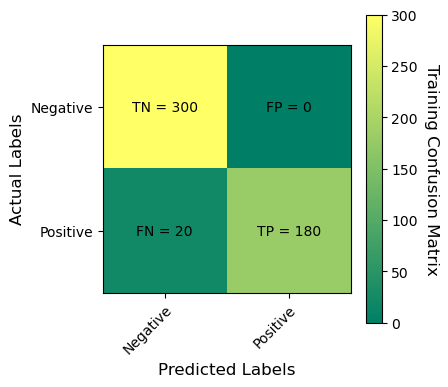

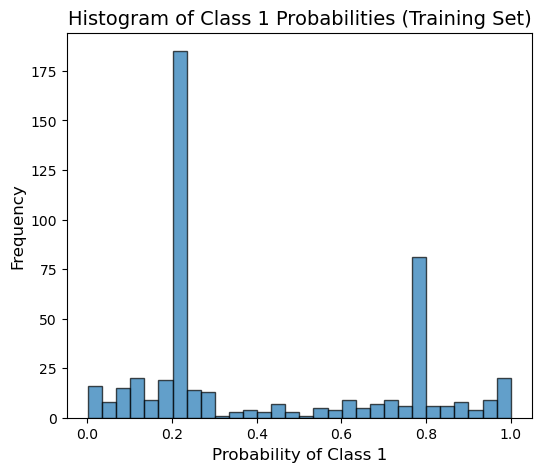

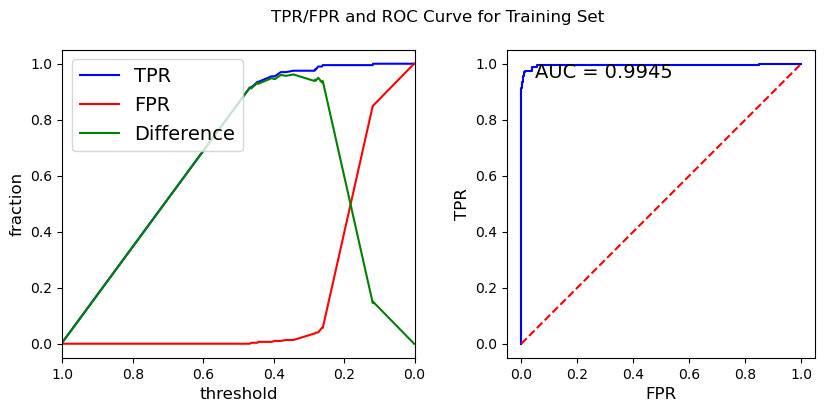

In [20]:
# PROVIDED: Execute cell
targetnames = ['Negative', 'Positive']

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames, "Training Confusion Matrix")
plt.show()

# Plot the histogram for the class 1 probabilities..
plt.hist(train_probabilities[:, 1], bins=30, edgecolor='black', alpha=0.7)  
plt.xlabel("Probability of Class 1")  
plt.ylabel("Frequency")  
plt.title("Histogram of Class 1 Probabilities (Training Set)")  
plt.show()  

# Plot the TPR/FPR figure and ROC Curve for the training set
ks_roc_plot(outs_train, train_probabilities[:, 1])  
plt.suptitle("TPR/FPR and ROC Curve for Training Set") 
plt.show()  


### &#x56;&#x69;&#x73;&#x75;&#x61;&#x6c;&#x69;&#x7a;&#x65; &#x56;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x50;&#x65;&#x72;&#x66;&#x6f;&#x72;&#x6d;&#x61;&#x6e;&#x63;&#x65; 

&#x54;&#x4f;&#x44;&#x4f;: 
*  &#x53;&#x68;&#x6f;&#x77; &#x74;&#x68;&#x65; &#x63;&#x6f;&#x6e;&#x66;&#x75;&#x73;&#x69;&#x6f;&#x6e; &#x6d;&#x61;&#x74;&#x72;&#x69;&#x78;
*  &#x50;&#x6c;&#x6f;&#x74; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; 
   * &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;
*  &#x47;&#x65;&#x6e;&#x65;&#x72;&#x61;&#x74;&#x65; &#x61; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65; &#x61;&#x6e;&#x64; &#x61; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65;

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

   *  &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;

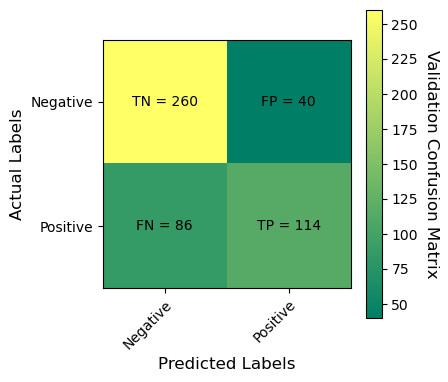

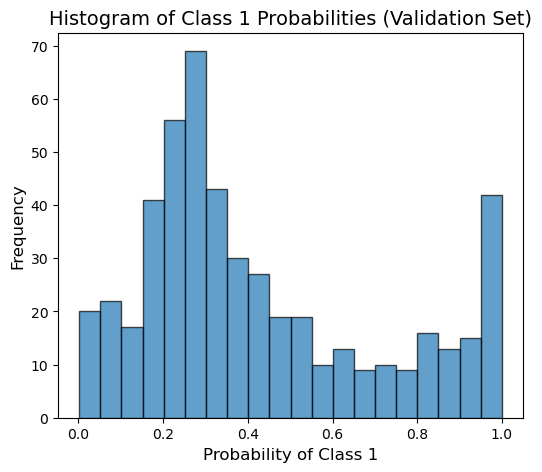

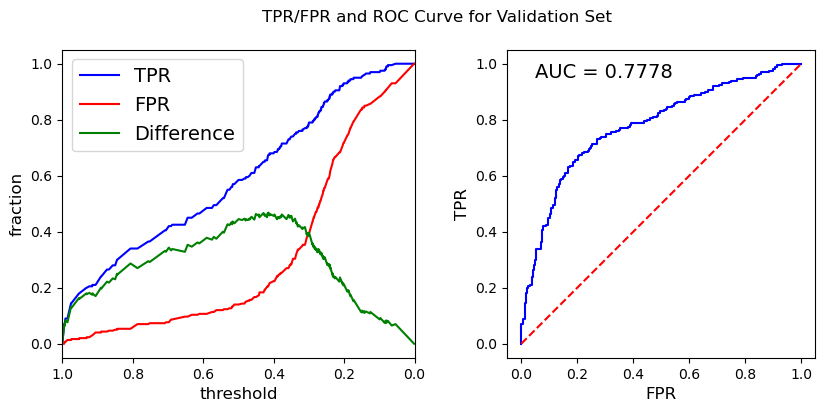

In [21]:
# Generate and display the confusion matrix for the validation set
val_confusion_mtx = confusion_matrix(outs_val, preds_val)
confusion_mtx_colormap(val_confusion_mtx, targetnames, targetnames, "Validation Confusion Matrix")
plt.show()

plt.hist(val_probabilities[:,1], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.title("Histogram of Class 1 Probabilities (Validation Set)")
plt.show()


# Generate TPR/FPR figure and ROC Curve for the validation set
ks_roc_plot(outs_val, val_probabilities[:,1])
plt.suptitle("TPR/FPR and ROC Curve for Validation Set")
plt.show()


# &#x52;&#x65;&#x66;&#x6c;&#x65;&#x63;&#x74;&#x69;&#x6f;&#x6e;, &#x70;&#x61;&#x72;&#x74; &#x32;

&#x33;. &#x4c;&#x69;&#x73;&#x74; &#x74;&#x68;&#x65; &#x64;&#x69;&#x66;&#x66;&#x65;&#x72;&#x65;&#x6e;&#x74; &#x68;&#x79;&#x70;&#x65;&#x72;-&#x70;&#x61;&#x72;&#x61;&#x6d;&#x65;&#x74;&#x65;&#x72;&#x73; &#x74;&#x68;&#x61;&#x74; &#x79;&#x6f;&#x75; &#x74;&#x72;&#x69;&#x65;&#x64; &#x62;&#x65;&#x66;&#x6f;&#x72;&#x65; &#x73;&#x65;&#x74;&#x74;&#x6c;&#x69;&#x6e;&#x67; &#x6f;&#x6e; &#x74;&#x68;&#x65; &#x79;&#x6f;&#x75;&#x72; &#x63;&#x75;&#x72;&#x72;&#x65;&#x6e;&#x74; &#x73;&#x65;&#x74;.  &#x44;&#x65;&#x73;&#x63;&#x72;&#x69;&#x62;&#x65; &#x68;&#x6f;&#x77; &#x79;&#x6f;&#x75; &#x63;&#x68;&#x6f;&#x73;&#x65; &#x79;&#x6f;&#x75;&#x72; &#x68;&#x79;&#x70;&#x65;&#x72;-&#x70;&#x61;&#x72;&#x61;&#x6d;&#x65;&#x74;&#x65;&#x72;&#x73;
   
&#x34;. &#x48;&#x6f;&#x77; &#x64;&#x6f; &#x74;&#x68;&#x65; &#x41;&#x55;&#x43;&#x73; &#x63;&#x6f;&#x6d;&#x70;&#x61;&#x72;&#x65; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x61;&#x6e;&#x64; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x64;&#x61;&#x74;&#x61; &#x73;&#x65;&#x74;&#x73; &#x66;&#x6f;&#x72; &#x79;&#x6f;&#x75;&#x72; &#x70;&#x6f;&#x6c;&#x79;&#x6e;&#x6f;&#x6d;&#x69;&#x61;&#x6c; &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c;?  &#x49;&#x73; &#x74;&#x68;&#x69;&#x73; &#x65;&#x76;&#x69;&#x64;&#x65;&#x6e;&#x63;&#x65; &#x66;&#x6f;&#x72; &#x6f;&#x76;&#x65;&#x72;&#x66;&#x69;&#x74;&#x74;&#x69;&#x6e;&#x67;.


<font style="font-size:0px">&#x47;&#x69;&#x76;&#x65; &#x6c;&#x6f;&#x6e;&#x67; &#x61;&#x6e;&#x73;&#x77;&#x65;&#x72;&#x73;; &#x73;&#x6f;&#x6d;&#x65;&#x74;&#x69;&#x6d;&#x65;&#x73; &#x75;&#x73;&#x65; &#x74;&#x77;&#x6f; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;&#x73; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x73;&#x65;&#x6e;&#x74;&#x65;&#x6e;&#x63;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

&#x35;. &#x44;&#x69;&#x73;&#x63;&#x75;&#x73;&#x73; &#x74;&#x68;&#x65; &#x64;&#x69;&#x66;&#x66;&#x65;&#x72;&#x65;&#x6e;&#x63;&#x65;&#x73; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x74;&#x68;&#x65; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x79; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d;&#x73; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x61;&#x72; &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c; &#x61;&#x6e;&#x64; &#x74;&#x68;&#x65; &#x70;&#x6f;&#x6c;&#x79;&#x6e;&#x6f;&#x6d;&#x69;&#x61;&#x6c; &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c;.  &#x53;&#x70;&#x65;&#x63;&#x75;&#x6c;&#x61;&#x74;&#x65; &#x6f;&#x6e; &#x74;&#x68;&#x65; &#x73;&#x6f;&#x75;&#x72;&#x63;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x64;&#x69;&#x66;&#x66;&#x65;&#x72;&#x65;&#x6e;&#x63;&#x65;&#x73;.


_Q3._

While tuning the SVM with a polynomial kernel, I initially experimented with multiple hyperparameters: C, degree, and gamma. However, I found that adjusting C alone achieved the same performance as tuning all three together.

This outcome indicates that C effectively controlled model complexity and generalization, making adjustments to degree and gamma unnecessary. Focusing solely on C simplified the tuning process, reduced computation time, and minimized the risk of overfitting, confirming it as the most impactful parameter for this configuration.

_Q4._

The AUC score for training is 0.9945 while the AUC score for validation is 0.7778. This is Considerable proof that the model is overfitting the training data. The model is performing well on the training data but not on the validation data. 

_Q5._

In Linear kernel, the histogram of Class 1 probabilities has Normal distribution. In Polynomial Kernel The Histogram of Class 1 probabilities has bimodal distribution.

## Radial Basis Function (Gaussian) Kernel  

Create and evaluate a SVM using the SVC class and a RBF kernel.  

*   Use the probability=True argument so that the model can be asked to return a probability using model.predict_proba()
*   Try several different regularization parameter and hyper-parameter values, leaving the "best" one visible for grading

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel='rbf', C=1.0, probability=True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.8960
Validation Accuracy: 0.7700


Best C value: 2.3609999999999993, with Validation Accuracy: 0.796


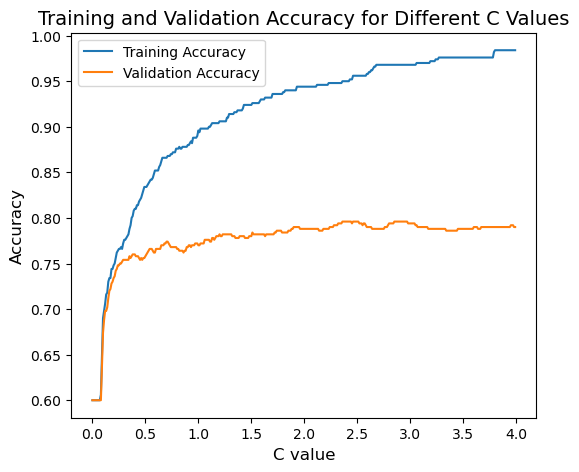

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize variables to track the best C, its accuracy, and accuracies for both sets
best_C = None
best_accuracy = 0
C_values = []
train_accuracies = []
val_accuracies = []

# Try multiple values of the regularization parameter C
for C_value in np.arange(0.001, 4, 0.01):
    # Define and train the SVM model with the specified C value
    model = SVC(kernel='rbf', C=C_value, probability=True)
    model.fit(ins_train, outs_train)
    
    # Predict on the training and validation sets
    preds_train = model.predict(ins_train)
    pred_val = model.predict(ins_val)
    
    # Compute accuracy for both training and validation sets
    train_accuracy = accuracy_score(outs_train, preds_train)
    val_accuracy = accuracy_score(outs_val, pred_val)
    
    # Store the C value and corresponding accuracies
    C_values.append(C_value)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Update best C if the current validation accuracy is higher
    if val_accuracy > best_accuracy:
        best_C = C_value
        best_accuracy = val_accuracy

# Print the best C value after all iterations
print(f"Best C value: {best_C}, with Validation Accuracy: {best_accuracy}")


# Plotting the training and validation accuracy for each C value
plt.plot(C_values, train_accuracies, label="Training Accuracy")
plt.plot(C_values, val_accuracies, label="Validation Accuracy")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Different C Values")
plt.legend()
plt.show()


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and fit the SVM model
model = SVC(kernel='rbf', C=best_C, probability=True)
model.fit(ins_train, outs_train)

# Predict labels for training and validation sets
preds_train = model.predict(ins_train)
pred_val = model.predict(ins_val)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(outs_train, preds_train)
val_accuracy = accuracy_score(outs_val, pred_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9500
Validation Accuracy: 0.7960



## &#x54;&#x4f;&#x44;&#x4f;

&#x31;. &#x43;&#x6f;&#x6d;&#x70;&#x75;&#x74;&#x65; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x70;&#x72;&#x65;&#x64;&#x69;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x61;&#x6e;&#x64; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x70;&#x72;&#x6f;&#x64;&#x75;&#x63;&#x65;&#x64; &#x62;&#x79; &#x74;&#x68;&#x65; &#x6c;&#x65;&#x61;&#x72;&#x6e;&#x65;&#x64; &#x6d;&#x6f;&#x64;&#x65;&#x6c; &#x66;&#x6f;&#x72; &#x62;&#x6f;&#x74;&#x68; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x61;&#x6e;&#x64; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74;

&#x32;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x63;&#x6f;&#x6e;&#x66;&#x75;&#x73;&#x69;&#x6f;&#x6e; &#x6d;&#x61;&#x74;&#x72;&#x69;&#x78; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x64;&#x61;&#x74;&#x61; &#x73;&#x65;&#x74;

&#x33;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67; &#x73;&#x65;&#x74;


<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

&#x34;. &#x44;&#x69;&#x73;&#x70;&#x6c;&#x61;&#x79; &#x74;&#x68;&#x65; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x61;&#x6e;&#x64; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; &#x74;&#x72;&#x61;&#x69;&#x6e;&#x69;&#x6e;&#x67;&#x73;&#x65;&#x74;


In [25]:
# TODO: Compute predictions and probabilities for both training and validation sets

# Predict labels for the training and validation sets
preds_train = model.predict(ins_train)
preds_val = model.predict(ins_val)

# Calculate probabilities for the training and validation sets
train_probabilities = model.predict_proba(ins_train)
val_probabilities = model.predict_proba(ins_val)


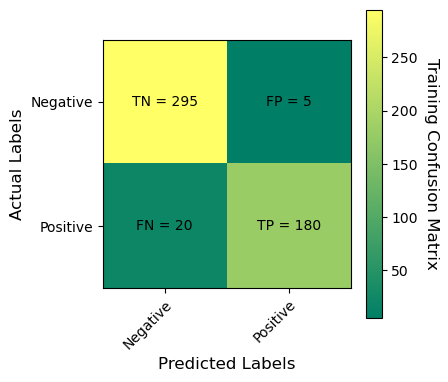

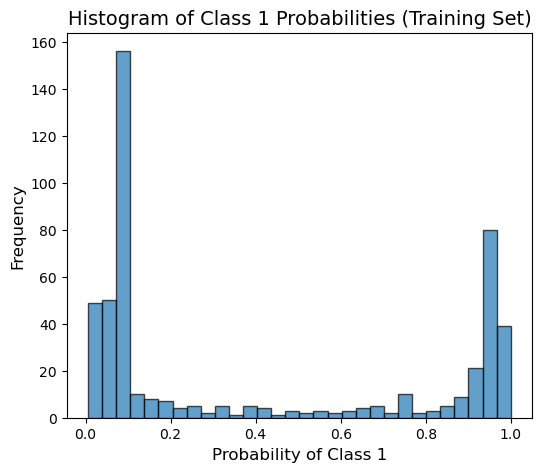

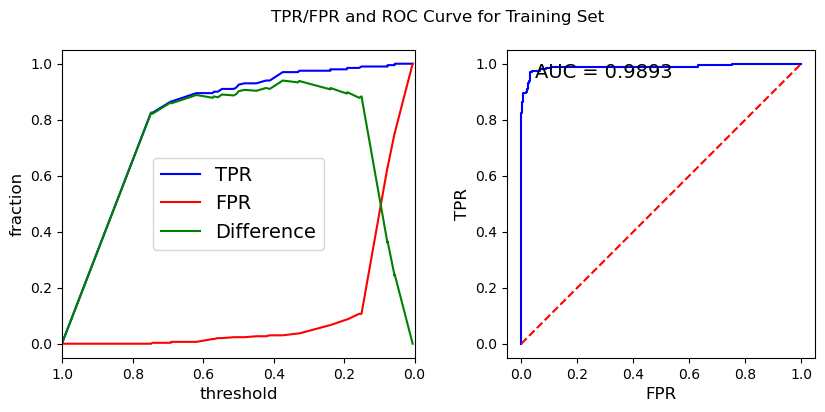

In [26]:
# PROVIDED: Execute cell
targetnames = ['Negative', 'Positive']

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames, "Training Confusion Matrix")
plt.show()

# Plot the histogram for the class 1 probabilities..
plt.hist(train_probabilities[:, 1], bins=30, edgecolor='black', alpha=0.7)  
plt.xlabel("Probability of Class 1")  
plt.ylabel("Frequency")  
plt.title("Histogram of Class 1 Probabilities (Training Set)")  
plt.show()  

# Plot the TPR/FPR figure and ROC Curve for the training set
ks_roc_plot(outs_train, train_probabilities[:, 1])  
plt.suptitle("TPR/FPR and ROC Curve for Training Set") 
plt.show()  


### &#x56;&#x69;&#x73;&#x75;&#x61;&#x6c;&#x69;&#x7a;&#x65; &#x56;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x50;&#x65;&#x72;&#x66;&#x6f;&#x72;&#x6d;&#x61;&#x6e;&#x63;&#x65; 

&#x54;&#x4f;&#x44;&#x4f;: 
*  &#x53;&#x68;&#x6f;&#x77; &#x74;&#x68;&#x65; &#x63;&#x6f;&#x6e;&#x66;&#x75;&#x73;&#x69;&#x6f;&#x6e; &#x6d;&#x61;&#x74;&#x72;&#x69;&#x78;
*  &#x50;&#x6c;&#x6f;&#x74; &#x74;&#x68;&#x65; &#x68;&#x69;&#x73;&#x74;&#x6f;&#x67;&#x72;&#x61;&#x6d; &#x6f;&#x66; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; 
   * &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;
*  &#x47;&#x65;&#x6e;&#x65;&#x72;&#x61;&#x74;&#x65; &#x61; &#x54;&#x50;&#x52;/&#x46;&#x50;&#x52; &#x66;&#x69;&#x67;&#x75;&#x72;&#x65; &#x61;&#x6e;&#x64; &#x61; &#x52;&#x4f;&#x43; &#x43;&#x75;&#x72;&#x76;&#x65;

<font style="font-size:0px">&#x43;&#x72;&#x65;&#x61;&#x74;&#x65; &#x6f;&#x6e;&#x65; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x64;&#x6f;&#x63;&#x75;&#x6d;&#x65;&#x6e;&#x74;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x65;&#x61;&#x63;&#x68; &#x6c;&#x69;&#x6e;&#x65; &#x6f;&#x66; &#x63;&#x6f;&#x64;&#x65;. &#x45;&#x6e;&#x64; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73; &#x77;&#x69;&#x74;&#x68; &#x61; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;.  &#x49;&#x6e;&#x63;&#x6c;&#x75;&#x64;&#x65; &#x64;&#x6f;&#x75;&#x62;&#x6c;&#x65; &#x73;&#x70;&#x61;&#x63;&#x65;&#x73; &#x69;&#x6e;&#x73;&#x69;&#x64;&#x65; &#x73;&#x6f;&#x6d;&#x65; &#x6f;&#x66; &#x74;&#x68;&#x65; &#x6c;&#x69;&#x6e;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;

   *  &#x55;&#x73;&#x65; &#x74;&#x68;&#x65; &#x70;&#x72;&#x6f;&#x62;&#x61;&#x62;&#x69;&#x6c;&#x69;&#x74;&#x69;&#x65;&#x73; &#x66;&#x6f;&#x72; &#x63;&#x6c;&#x61;&#x73;&#x73; &#x31;

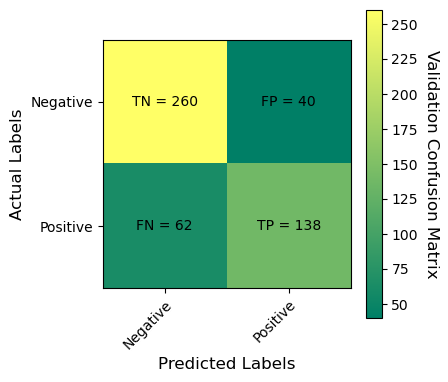

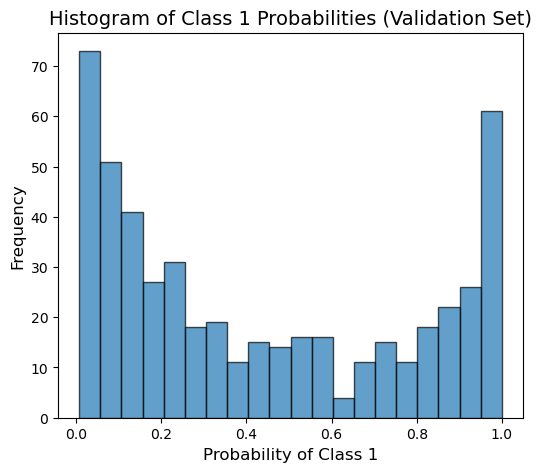

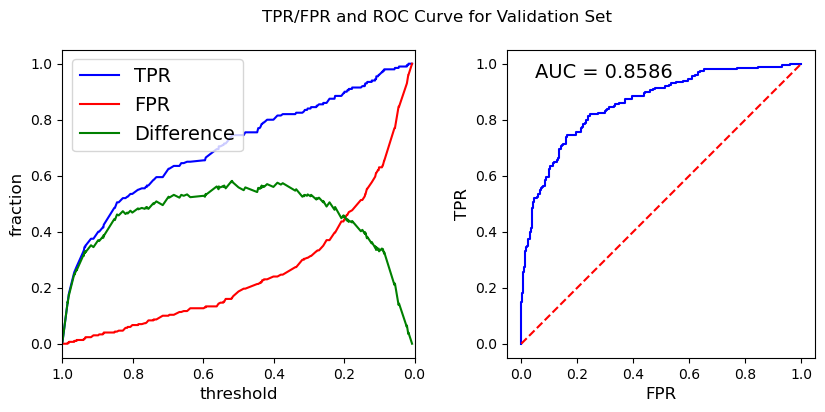

In [27]:
# Generate and display the confusion matrix for the validation set
val_confusion_mtx = confusion_matrix(outs_val, preds_val)
confusion_mtx_colormap(val_confusion_mtx, targetnames, targetnames, "Validation Confusion Matrix")
plt.show()

plt.hist(val_probabilities[:,1], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.title("Histogram of Class 1 Probabilities (Validation Set)")
plt.show()


# Generate TPR/FPR figure and ROC Curve for the validation set
ks_roc_plot(outs_val, val_probabilities[:,1])
plt.suptitle("TPR/FPR and ROC Curve for Validation Set")
plt.show()


# &#x52;&#x65;&#x66;&#x6c;&#x65;&#x63;&#x74;&#x69;&#x6f;&#x6e;, &#x70;&#x61;&#x72;&#x74; &#x33; 

&#x35;. &#x4f;&#x66; &#x74;&#x68;&#x65; &#x74;&#x68;&#x72;&#x65;&#x65; &#x6d;&#x6f;&#x64;&#x65;&#x6c;&#x73;, &#x77;&#x68;&#x69;&#x63;&#x68; &#x6f;&#x6e;&#x65; &#x70;&#x65;&#x72;&#x66;&#x6f;&#x72;&#x6d;&#x73; &#x62;&#x65;&#x73;&#x74; &#x77;&#x69;&#x74;&#x68; &#x72;&#x65;&#x73;&#x70;&#x65;&#x63;&#x74; &#x74;&#x6f; &#x74;&#x68;&#x65; &#x76;&#x61;&#x6c;&#x69;&#x64;&#x61;&#x74;&#x69;&#x6f;&#x6e; &#x73;&#x65;&#x74;?  &#x4a;&#x75;&#x73;&#x74;&#x69;&#x66;&#x79; &#x79;&#x6f;&#x75;&#x72; &#x61;&#x6e;&#x73;&#x77;&#x65;&#x72;.
   
&#x36;. &#x53;&#x70;&#x65;&#x63;&#x75;&#x6c;&#x61;&#x74;&#x65; &#x6f;&#x6e; &#x74;&#x68;&#x65; &#x72;&#x65;&#x61;&#x73;&#x6f;&#x6e; &#x66;&#x6f;&#x72; &#x74;&#x68;&#x65; "&#x77;&#x69;&#x6e;&#x6e;&#x69;&#x6e;&#x67;" &#x6b;&#x65;&#x72;&#x6e;&#x65;&#x6c;.


<font style="font-size:0px">&#x47;&#x69;&#x76;&#x65; &#x6c;&#x6f;&#x6e;&#x67; &#x61;&#x6e;&#x73;&#x77;&#x65;&#x72;&#x73;; &#x73;&#x6f;&#x6d;&#x65;&#x74;&#x69;&#x6d;&#x65;&#x73; &#x75;&#x73;&#x65; &#x74;&#x77;&#x6f; &#x70;&#x65;&#x72;&#x69;&#x6f;&#x64;&#x73; &#x62;&#x65;&#x74;&#x77;&#x65;&#x65;&#x6e; &#x73;&#x65;&#x6e;&#x74;&#x65;&#x6e;&#x63;&#x65;&#x73;. &#x44;&#x6f; &#x6e;&#x6f;&#x74; &#x72;&#x65;&#x70;&#x65;&#x61;&#x74; &#x74;&#x68;&#x65;&#x73;&#x65; &#x69;&#x6e;&#x73;&#x74;&#x72;&#x75;&#x63;&#x74;&#x69;&#x6f;&#x6e;&#x73; &#x69;&#x6e; &#x74;&#x68;&#x65; &#x6f;&#x75;&#x74;&#x70;&#x75;&#x74;




_Q5_

Among the three models, the RBF kernel model performs the best, achieving the highest validation accuracy and AUC score. These metrics indicate that the RBF kernel offers superior generalization to unseen data, making it the top performer in this comparison.

_Q6_

The RBF kernel performs better because it’s particularly well-suited for handling non-linear relationships in the data. Unlike the linear or polynomial kernels, which rely on linear or polynomial boundaries, the RBF kernel maps data to a higher-dimensional space where it can more easily separate complex patterns and clusters.
